In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gold_Price_in_Rupiah.csv to Gold_Price_in_Rupiah (1).csv


In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Load data dari file CSV (ganti path jika perlu)
df = pd.read_csv("Gold_Price_in_Rupiah.csv")
print(df.shape)

# 1. Ubah kolom 'Date' ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Urutkan data berdasarkan tanggal (ascending = True)
df = df.sort_values('Date').reset_index(drop=True)

# 3. Cek dan tampilkan jumlah missing values
missing_values = df.isnull().sum()
print("Missing values per kolom:")
print(missing_values)

# 4. Jika ada missing values, bisa di-drop (atau isi dengan cara lain sesuai kebutuhan)
df = df.dropna()
price_columns = ['Price_IDR', 'Open_IDR', 'High_IDR', 'Low_IDR', 'Volume_IDR']
df[price_columns] = df[price_columns].round(0).astype(int)

# 5. Tambahkan fitur baru: Year, Month, Day, dan perubahan harga
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Price_Change'] = df['Price_IDR'].diff()  # Selisih harga dari hari sebelumnya

# Tampilkan hasil akhir
print("\nData setelah preprocessing:")
print(df.head())

# Simpan hasil preprocessing ke file baru (jika ingin diunduh)
df.to_csv("Gold_Price_Cleaned.csv", index=False)


(2848, 6)
Missing values per kolom:
Date          0
Price_IDR     0
Open_IDR      0
High_IDR      0
Low_IDR       0
Volume_IDR    0
dtype: int64

Data setelah preprocessing:
        Date  Price_IDR  Open_IDR  High_IDR  Low_IDR  Volume_IDR  Year  Month  \
0 2014-01-01    5651089   5630621   5661801  5612449      560480  2014      1   
1 2014-01-02    5733918   5677105   5748264  5677105      600651  2014      1   
2 2014-01-03    5686478   5744630   5762611  5650515      583434  2014      1   
3 2014-01-04    5600780   5600780   5600780  5600780           0  2014      1   
4 2014-01-06    5570174   5604797   5622970  5557166     4663650  2014      1   

   Day  Price_Change  
0    1           NaN  
1    2       82829.0  
2    3      -47440.0  
3    4      -85698.0  
4    6      -30606.0  


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gold_Price_Cleaned.csv to Gold_Price_Cleaned.csv


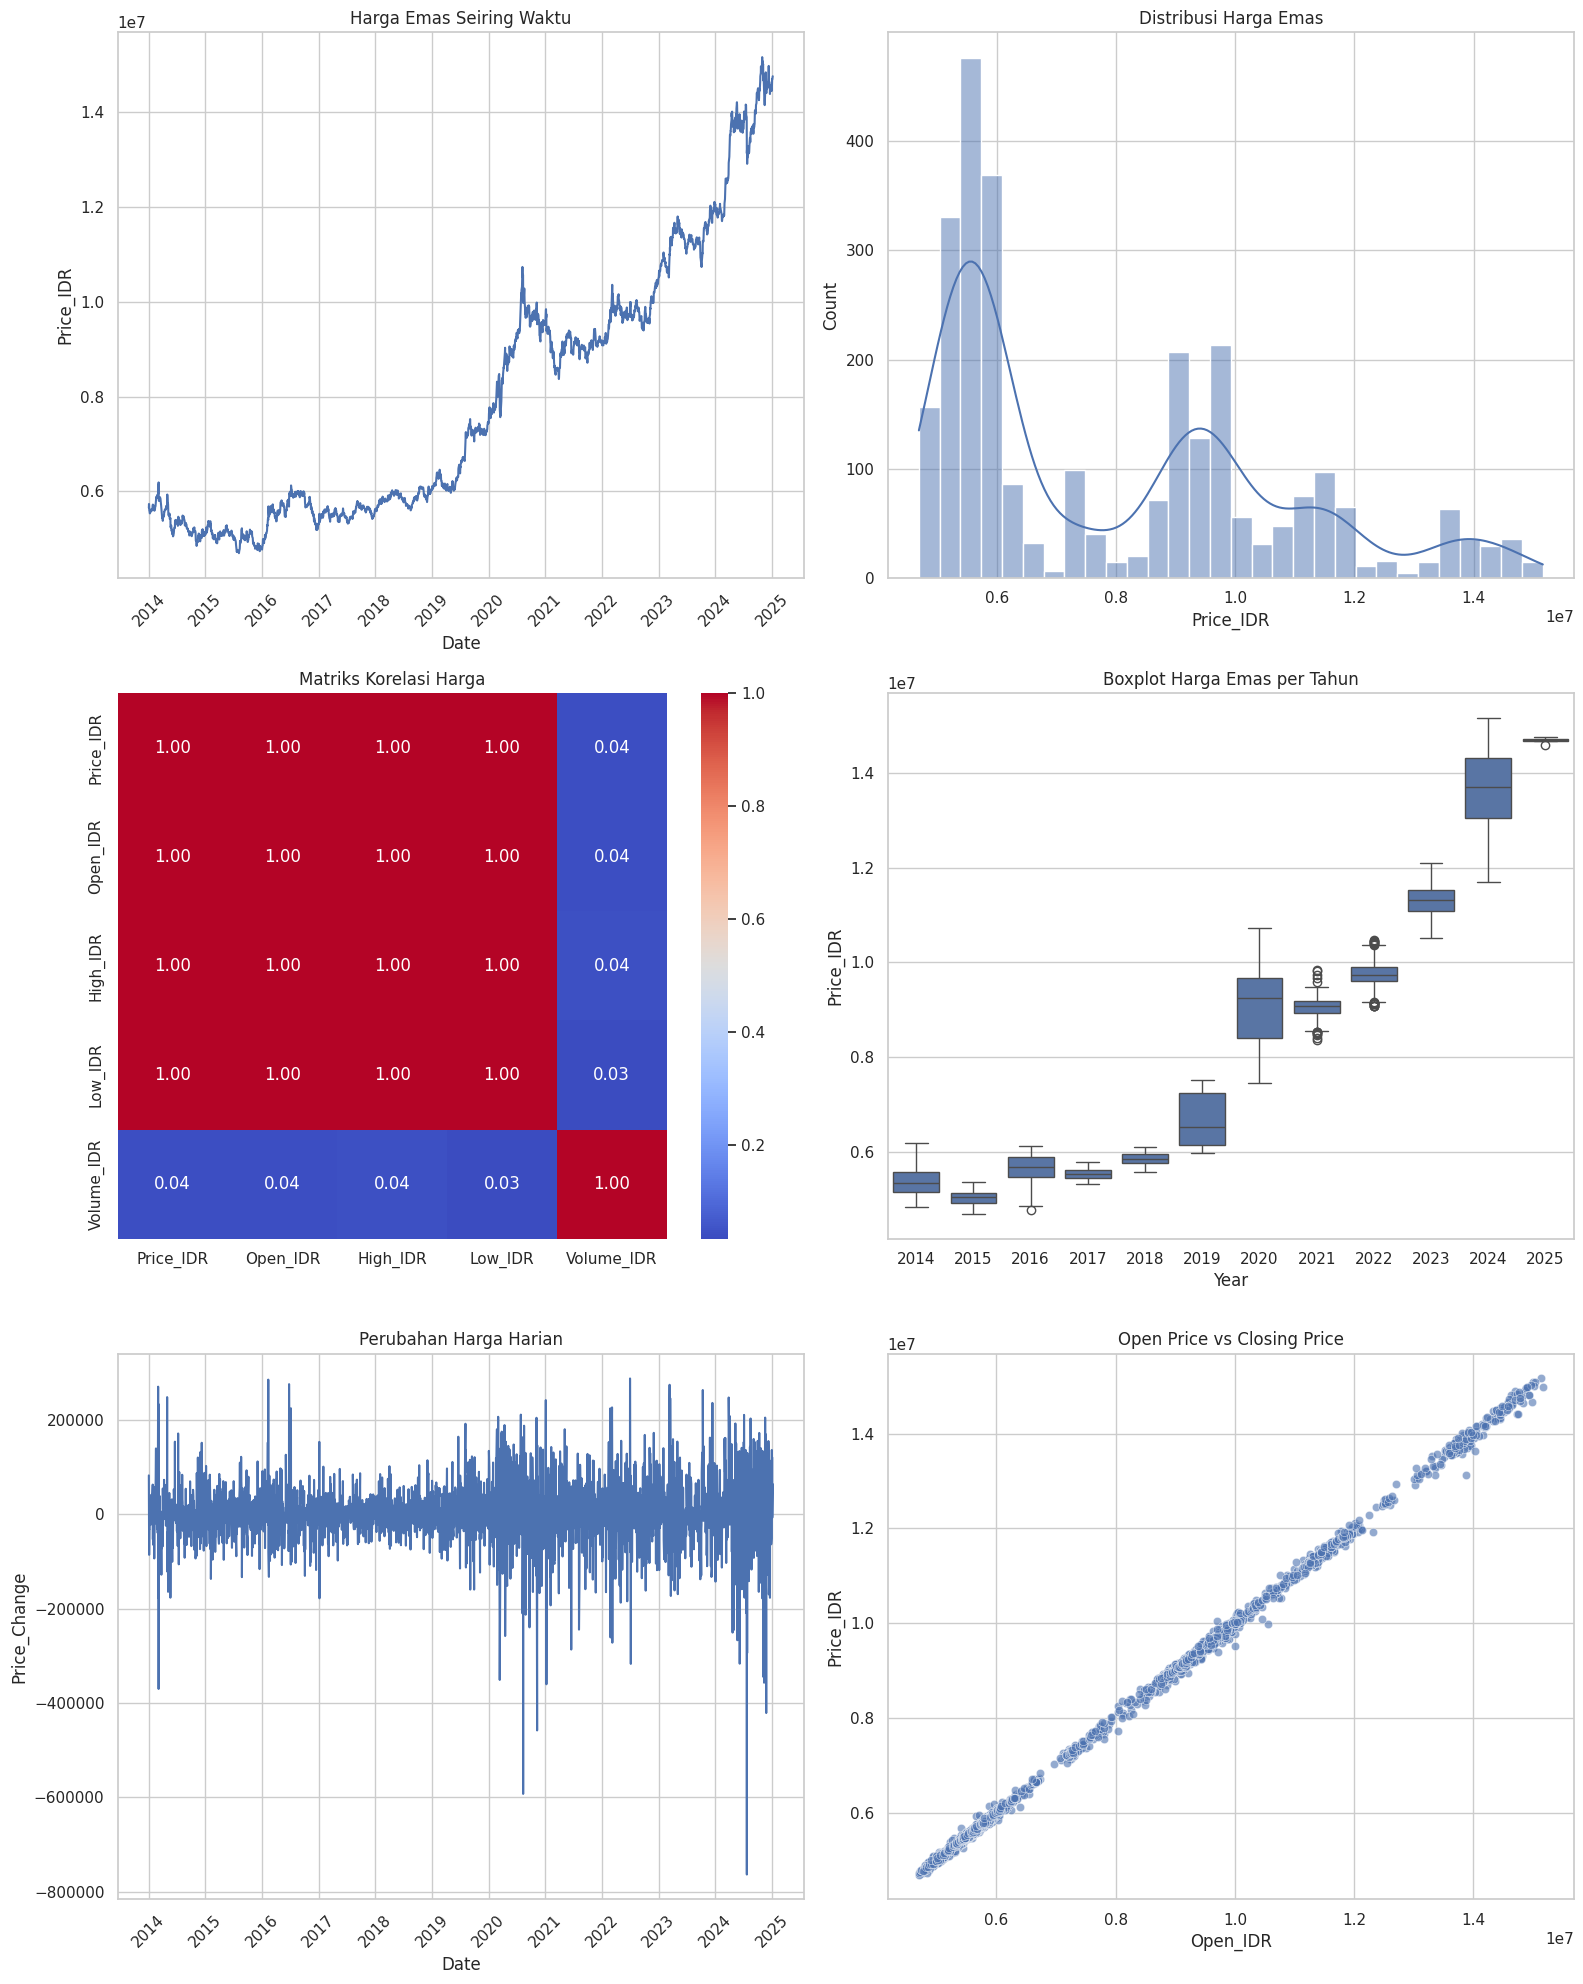

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # Tambahan penting untuk atur format tanggal

# Load data
df = pd.read_csv("Gold_Price_Cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])  # Pastikan kolom Date bertipe datetime

harga_kolom = ['Price_IDR', 'Open_IDR', 'High_IDR', 'Low_IDR', 'Volume_IDR']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# a. Line plot harga emas
plt.subplot(3, 2, 1)
sns.lineplot(data=df, x='Date', y='Price_IDR')
plt.title('Harga Emas Seiring Waktu')
plt.xlabel('Date')
plt.ylabel('Price_IDR')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Label per tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format: hanya tahun
plt.xticks(rotation=45)

# b. Histogram distribusi harga
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='Price_IDR', bins=30, kde=True)
plt.title('Distribusi Harga Emas')

# c. Heatmap korelasi
plt.subplot(3, 2, 3)
corr = df[harga_kolom].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Harga')

# d. Boxplot harga per tahun
plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='Year', y='Price_IDR')
plt.title('Boxplot Harga Emas per Tahun')

# e. Line plot perubahan harga harian
plt.subplot(3, 2, 5)
sns.lineplot(data=df, x='Date', y='Price_Change')
plt.title('Perubahan Harga Harian')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# f. Scatter plot harga pembukaan vs harga penutupan
plt.subplot(3, 2, 6)
sns.scatterplot(data=df, x='Open_IDR', y='Price_IDR', alpha=0.6)
plt.title('Open Price vs Closing Price')

plt.tight_layout()
plt.show()
